In [1]:
import pandas as pd
from src.DatabaseConnection import DatabaseConnection
from dotenv import find_dotenv
import matplotlib.pyplot as plt

#### Matplotlib style

In [2]:
plt.style.use("bmh")

#### Connecting to Database (DB)

In [3]:
dotenv_path = find_dotenv()
db = DatabaseConnection(dotenv_path)

#### Selecting data from DB and converting it to DataFrame

In [4]:
query = """SELECT m.win, p.team_id, p.lane, p.rank, p.division, 
c.champion_name, p.dmg_taken_per_min, p.first_blood, p.dmg_to_towers, p.vision_score_per_min
FROM player_data AS p 
JOIN champions AS c ON p.champion_id = c.champion_id
JOIN match_data AS m ON p.match_id = m.match_id
WHERE p.rank!='UNRANKED' AND p.lane != 'None' 
"""
player_data = db.execute_select_query(query)

In [5]:
player_match_data = pd.DataFrame(player_data)
player_match_data

,win,team_id,lane,rank,division,champion_name,dmg_taken_per_min,first_blood,dmg_to_towers,vision_score_per_min
0,RED,200,BOT,GOLD,1,Kai'Sa,1025.130,0,5425.0,0.597045
1,RED,100,TOP,PLATINUM,4,Aatrox,1513.310,0,5697.0,0.867568
2,BLUE,100,TOP,EMERALD,4,Olaf,1054.560,0,5533.0,0.723974
3,BLUE,200,TOP,PLATINUM,1,Gangplank,715.457,0,3709.0,0.585110
4,BLUE,100,BOT,DIAMOND,4,Draven,896.938,0,5245.0,0.483216
...,...,...,...,...,...,...,...,...,...,...
6497,RED,100,MID,SILVER,3,Aurelion Sol,804.088,0,0.0,0.452939
6498,RED,100,TOP,SILVER,4,Camille,1074.780,0,2789.0,0.278843
6499,RED,100,BOT,SILVER,3,Jhin,701.088,0,459.0,0.518375
6500,RED,200,JNG,SILVER,2,Briar,1331.750,0,3064.0,0.697508


#### Data cleaning

In [6]:
teams = {
    "100": "BLUE",
    "200": "RED"
}

player_match_data['team_id'] = player_match_data['team_id'].replace(teams)
player_match_data

,win,team_id,lane,rank,division,champion_name,dmg_taken_per_min,first_blood,dmg_to_towers,vision_score_per_min
0,RED,RED,BOT,GOLD,1,Kai'Sa,1025.130,0,5425.0,0.597045
1,RED,BLUE,TOP,PLATINUM,4,Aatrox,1513.310,0,5697.0,0.867568
2,BLUE,BLUE,TOP,EMERALD,4,Olaf,1054.560,0,5533.0,0.723974
3,BLUE,RED,TOP,PLATINUM,1,Gangplank,715.457,0,3709.0,0.585110
4,BLUE,BLUE,BOT,DIAMOND,4,Draven,896.938,0,5245.0,0.483216
...,...,...,...,...,...,...,...,...,...,...
6497,RED,BLUE,MID,SILVER,3,Aurelion Sol,804.088,0,0.0,0.452939
6498,RED,BLUE,TOP,SILVER,4,Camille,1074.780,0,2789.0,0.278843
6499,RED,BLUE,BOT,SILVER,3,Jhin,701.088,0,459.0,0.518375
6500,RED,RED,JNG,SILVER,2,Briar,1331.750,0,3064.0,0.697508


In [7]:
player_match_data["did_win"] = player_match_data["win"] == player_match_data["team_id"]
player_match_data.head()

,win,team_id,lane,rank,division,champion_name,dmg_taken_per_min,first_blood,dmg_to_towers,vision_score_per_min,did_win
0,RED,RED,BOT,GOLD,1,Kai'Sa,1025.130,0,5425.0,0.597045,True
1,RED,BLUE,TOP,PLATINUM,4,Aatrox,1513.310,0,5697.0,0.867568,False
2,BLUE,BLUE,TOP,EMERALD,4,Olaf,1054.560,0,5533.0,0.723974,True
3,BLUE,RED,TOP,PLATINUM,1,Gangplank,715.457,0,3709.0,0.585110,False
4,BLUE,BLUE,BOT,DIAMOND,4,Draven,896.938,0,5245.0,0.483216,True


#### Top 10 most popular champions

Median of champion appearance in games:  32.0
Mean of champion appearance in games:  38.93413173652694


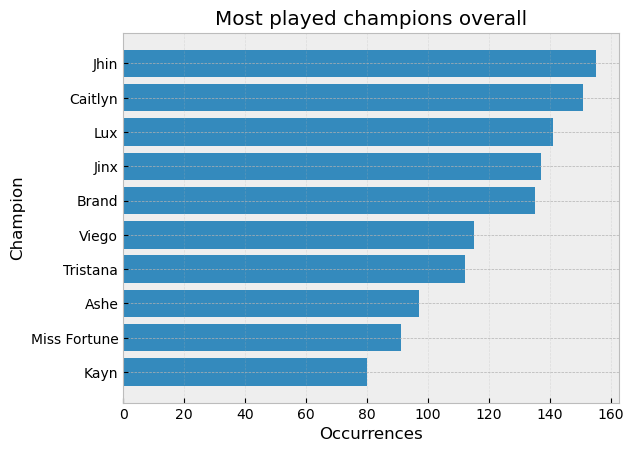

In [8]:
champion_count = player_match_data[["champion_name"]].groupby("champion_name").size().reset_index(name='count')

median_champ_freq = champion_count["count"].median()
mean_champ_freq = champion_count["count"].mean()

print("Median of champion appearance in games: ", median_champ_freq )
print("Mean of champion appearance in games: ", mean_champ_freq)

sorted_champion_count = champion_count.sort_values(by='count', ascending=False)
# 10 most frequent champions
champion_10 = sorted_champion_count["champion_name"][:10].tolist()

champion_todo = []
for index, champ in sorted_champion_count.iterrows():
    if champ["count"] > median_champ_freq:
        champion_todo.append(champ["champion_name"])

sorted_champion_count = sorted_champion_count[:10][::-1]


plt.barh(sorted_champion_count["champion_name"], sorted_champion_count["count"])
plt.grid(axis="x", alpha=0.3, linestyle="--")
plt.title("Most played champions overall")
plt.ylabel("Champion")
plt.xlabel("Occurrences")
plt.show()

In [9]:
filtered_player_data = player_match_data[player_match_data['champion_name'].isin(champion_todo)]
filtered_player_data

,win,team_id,lane,rank,division,champion_name,dmg_taken_per_min,first_blood,dmg_to_towers,vision_score_per_min,did_win
0,RED,RED,BOT,GOLD,1,Kai'Sa,1025.130,0,5425.0,0.597045,True
4,BLUE,BLUE,BOT,DIAMOND,4,Draven,896.938,0,5245.0,0.483216,True
5,BLUE,BLUE,SUPP,GOLD,1,Senna,562.412,0,8786.0,2.042550,True
6,BLUE,RED,JNG,SILVER,1,Ekko,1356.920,0,0.0,0.780833,False
7,BLUE,RED,MID,PLATINUM,3,Yone,1286.750,1,4302.0,0.670173,False
...,...,...,...,...,...,...,...,...,...,...,...
6497,RED,BLUE,MID,SILVER,3,Aurelion Sol,804.088,0,0.0,0.452939,False
6498,RED,BLUE,TOP,SILVER,4,Camille,1074.780,0,2789.0,0.278843,False
6499,RED,BLUE,BOT,SILVER,3,Jhin,701.088,0,459.0,0.518375,False
6500,RED,RED,JNG,SILVER,2,Briar,1331.750,0,3064.0,0.697508,True


In [10]:
filtered_champion_10 = player_match_data[player_match_data['champion_name'].isin(champion_10)]
filtered_champion_10

,win,team_id,lane,rank,division,champion_name,dmg_taken_per_min,first_blood,dmg_to_towers,vision_score_per_min,did_win
8,RED,RED,BOT,EMERALD,4,Miss Fortune,702.696,0,6741.0,0.754379,True
14,BLUE,BLUE,BOT,EMERALD,4,Ashe,736.516,0,5586.0,0.636664,True
15,BLUE,RED,BOT,EMERALD,4,Caitlyn,695.359,0,2812.0,0.480584,False
20,BLUE,BLUE,JNG,PLATINUM,2,Brand,1177.560,0,2220.0,0.794150,True
24,RED,RED,BOT,PLATINUM,3,Jinx,863.749,1,5050.0,1.264260,True
...,...,...,...,...,...,...,...,...,...,...,...
6484,RED,BLUE,BOT,IRON,2,Miss Fortune,530.382,0,1573.0,0.600191,False
6485,RED,RED,BOT,IRON,3,Ashe,461.806,0,7717.0,0.534943,True
6494,RED,RED,BOT,SILVER,2,Ashe,620.106,0,6336.0,0.554413,True
6496,RED,BLUE,SUPP,SILVER,3,Lux,595.979,0,0.0,0.812082,False


####  Champion win rates

##### For all champions

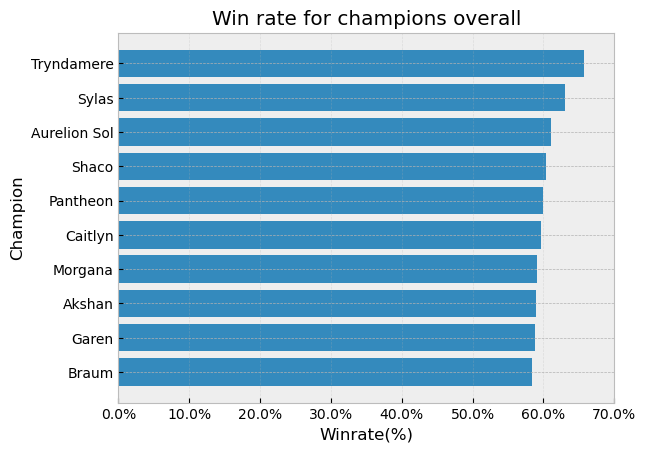

In [11]:
champion_winrate = filtered_player_data[["did_win","champion_name"]].groupby("champion_name").apply(lambda x: (x.sum()/len(x))*100)
sorted_champion_winrate = champion_winrate.sort_values(by='did_win', ascending=False)
sorted_champion_winrate.reset_index(inplace=True)
sorted_champion_winrate = sorted_champion_winrate[:10][::-1]

# visu
plt.barh(sorted_champion_winrate["champion_name"], sorted_champion_winrate["did_win"])
plt.grid(axis="x", alpha=0.3, linestyle="--")
plt.title("Win rate for champions overall")
plt.ylabel("Champion")
plt.xlabel("Winrate(%)")
locs, _ = plt.xticks()
plt.xticks(locs, [f"{label}%" for label in locs])
plt.show()

##### For 10 most played champions

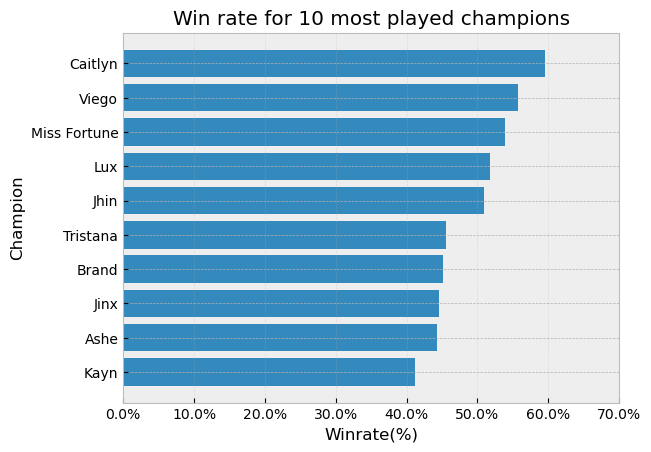

In [12]:
champion_10_winrate = filtered_champion_10[["did_win","champion_name"]].groupby("champion_name").apply(lambda x: (x.sum()/len(x))*100)
sorted_champion_10_winrate = champion_10_winrate.sort_values(by='did_win', ascending=False)
sorted_champion_10_winrate.reset_index(inplace=True)
sorted_champion_10_winrate = sorted_champion_10_winrate[::-1]

plt.barh(sorted_champion_10_winrate["champion_name"], sorted_champion_10_winrate["did_win"])
plt.grid(axis="x", alpha=0.3, linestyle="--")
plt.title("Win rate for 10 most played champions")
plt.ylabel("Champion")
plt.xlabel("Winrate(%)")
locs, _ = plt.xticks()
plt.xticks(locs, [f"{label}%" for label in locs])
plt.show()

#### Most first bloods

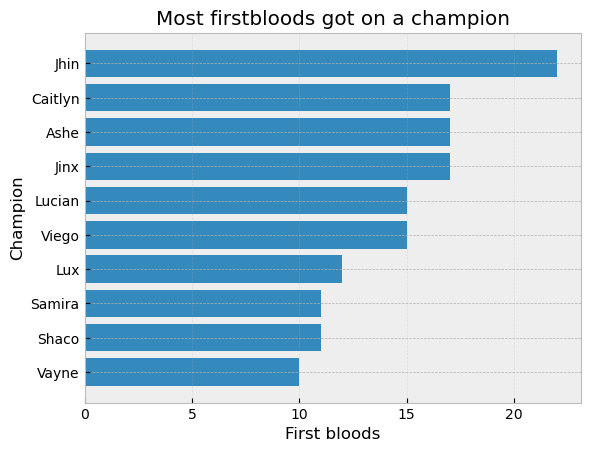

In [13]:
champion_firstblood = filtered_player_data[["champion_name", "first_blood"]].groupby("champion_name").sum()
sorted_champion_firstblood = champion_firstblood.sort_values(by="first_blood", ascending=False)
sorted_champion_firstblood.reset_index(inplace=True)
sorted_champion_firstblood = sorted_champion_firstblood[:10][::-1]

plt.barh(sorted_champion_firstblood["champion_name"], sorted_champion_firstblood["first_blood"])
plt.grid(axis="x", alpha=0.3, linestyle="--")
plt.title("Most first bloods got on a champion")
plt.ylabel("Champion")
plt.xlabel("First bloods")
plt.show()

#### Most damage to towers

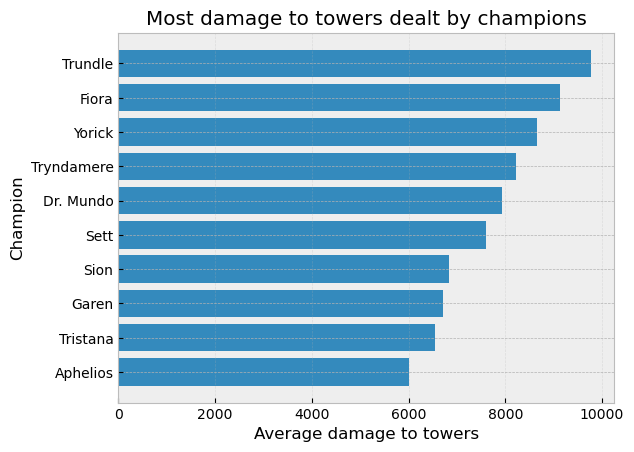

In [14]:
champion_dmg_to_towers = filtered_player_data[["champion_name", "dmg_to_towers"]].groupby("champion_name").mean()
champion_dmg_to_towers = champion_dmg_to_towers.sort_values(by="dmg_to_towers", ascending=False)
champion_dmg_to_towers.reset_index(inplace=True)
champion_dmg_to_towers = champion_dmg_to_towers[:10][::-1]

plt.barh(champion_dmg_to_towers["champion_name"], champion_dmg_to_towers["dmg_to_towers"])
plt.grid(axis="x", alpha=0.3, linestyle="--")
plt.title("Most damage to towers dealt by champions")
plt.ylabel("Champion")
plt.xlabel("Average damage to towers")
plt.show()

#### Best vision score per minute

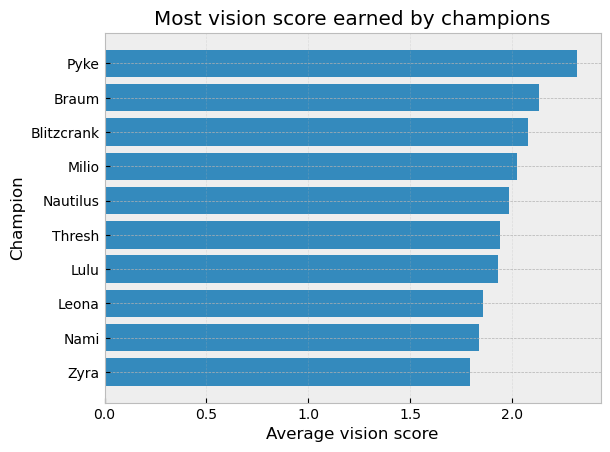

In [15]:
champion_vision_score = filtered_player_data[["champion_name", "vision_score_per_min"]].groupby("champion_name").mean()
champion_vision_score = champion_vision_score.sort_values(by="vision_score_per_min", ascending=False)
champion_vision_score.reset_index(inplace=True)
champion_vision_score = champion_vision_score[:10][::-1]

plt.barh(champion_vision_score["champion_name"], champion_vision_score["vision_score_per_min"])
plt.grid(axis="x", alpha=0.3, linestyle="--")
plt.title("Most vision score earned by champions")
plt.ylabel("Champion")
plt.xlabel("Average vision score")
plt.show()

#### Most damage taken 

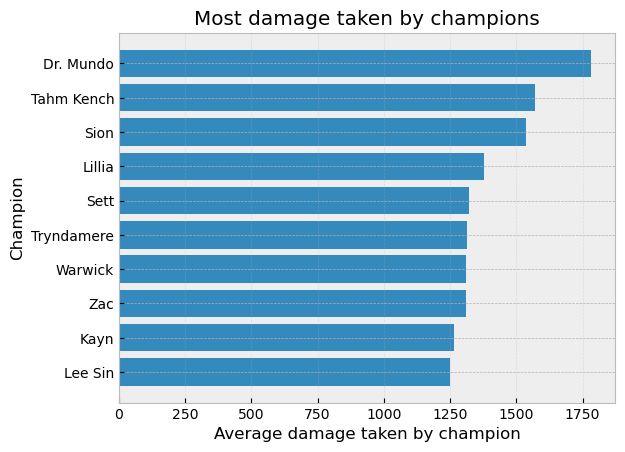

In [16]:
champion_dmg_taken = filtered_player_data[["champion_name", "dmg_taken_per_min"]].groupby("champion_name").mean()
champion_dmg_taken = champion_dmg_taken.sort_values(by="dmg_taken_per_min", ascending=False)
champion_dmg_taken.reset_index(inplace=True)
champion_dmg_taken = champion_dmg_taken[:10][::-1]

plt.barh(champion_dmg_taken["champion_name"], champion_dmg_taken["dmg_taken_per_min"])
plt.grid(axis="x", alpha=0.3, linestyle="--")
plt.title("Most damage taken by champions")
plt.ylabel("Champion")
plt.xlabel("Average damage taken by champion")
plt.show()

#### Most popular champions per division

In [17]:
champion_division_popularity = filtered_player_data[["champion_name", "rank"]].groupby("champion_name").value_counts()
champion_division_popularity= champion_division_popularity.reset_index()

matches_in_ranks = filtered_player_data[["rank"]].value_counts()
matches_in_ranks = matches_in_ranks // 10
matches_in_ranks

rank    
IRON        114
SILVER       81
BRONZE       81
DIAMOND      67
PLATINUM     63
GOLD         61
EMERALD       8
MASTER        5
Name: count, dtype: int64

##### Function to prepare champion popularity for visualization

In [18]:
def prepare_champion_popularity(rank_champ_popularity, rank_to_prepare):
    
    rank_champ_popularity = rank_champ_popularity.sort_values(by="count", ascending=False)
    rank_champ_popularity = rank_champ_popularity[:5]
    rank_champ_popularity[rank_champ_popularity.columns[2]] = rank_champ_popularity[rank_champ_popularity.columns[2]].astype(float)
    
    for idx, row in rank_champ_popularity.iterrows():
        value = float(rank_champ_popularity.at[idx, rank_champ_popularity.columns[2]] / matches_in_ranks.at[rank_to_prepare])
        rank_champ_popularity.at[idx, rank_champ_popularity.columns[2]] = value * 100
        
    rank_champ_popularity = rank_champ_popularity[::-1]
    
    return rank_champ_popularity

In [19]:
def visu_popularity(rank_popularity, rank_name):
    plt.barh(rank_popularity["champion_name"], rank_popularity["count"])
    plt.grid(axis="x", alpha=0.3, linestyle="--")
    plt.title(f"Most popular picks in {rank_name}.")
    plt.ylabel("Champion")
    plt.xlabel("Pick Rate(%)")
    loc, _ = plt.xticks()
    plt.xticks(loc, [f"{label}%" for label in loc])
    plt.show()

##### Iron

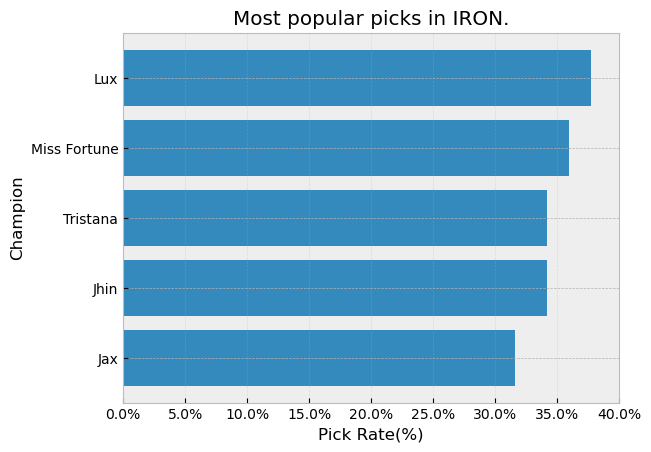

In [20]:
iron_rank = "IRON"
iron_champion_popularity = champion_division_popularity[champion_division_popularity["rank"]==iron_rank]
iron_champion_popularity_ready = prepare_champion_popularity(iron_champion_popularity, iron_rank)
visu_popularity(iron_champion_popularity_ready, iron_rank)

##### Bronze

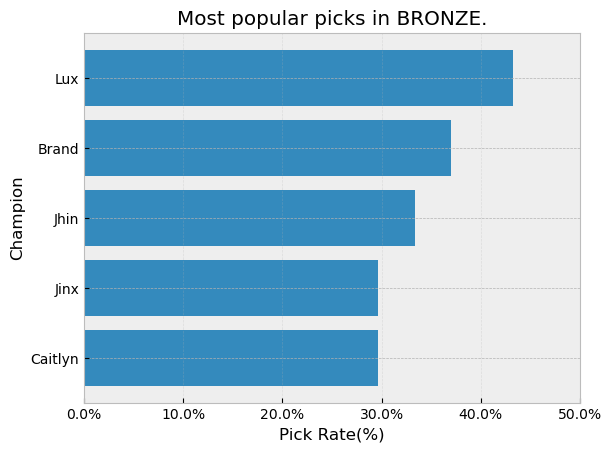

In [21]:
bronze_rank = "BRONZE"
bronze_champion_popularity = champion_division_popularity[champion_division_popularity["rank"]==bronze_rank]
bronze_champion_popularity_ready = prepare_champion_popularity(bronze_champion_popularity, bronze_rank)
visu_popularity(bronze_champion_popularity_ready, bronze_rank)

##### Silver

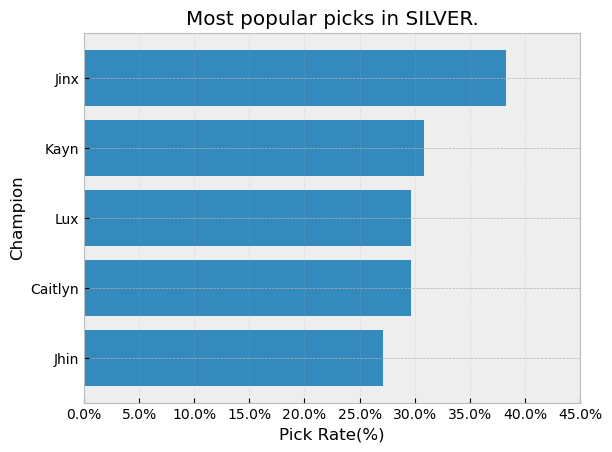

In [22]:
silver_rank = "SILVER"
silver_champion_popularity = champion_division_popularity[champion_division_popularity["rank"]==silver_rank]
silver_champion_popularity_ready = prepare_champion_popularity(silver_champion_popularity, silver_rank)
visu_popularity(silver_champion_popularity_ready, silver_rank)

##### Gold

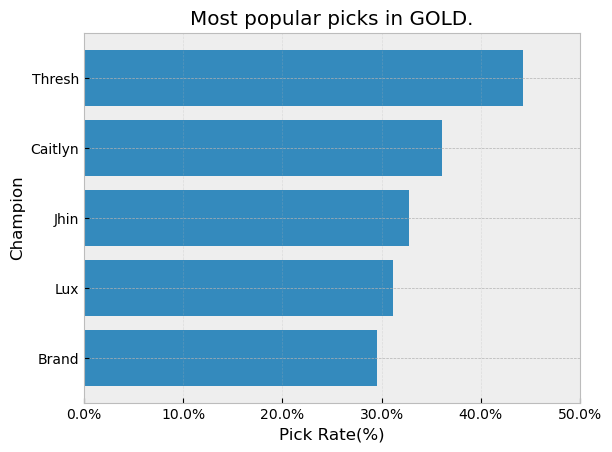

In [23]:
gold_rank = "GOLD"
gold_champion_popularity = champion_division_popularity[champion_division_popularity["rank"]==gold_rank]
gold_champion_popularity_ready = prepare_champion_popularity(gold_champion_popularity, gold_rank)
visu_popularity(gold_champion_popularity_ready, gold_rank)

##### Platinum

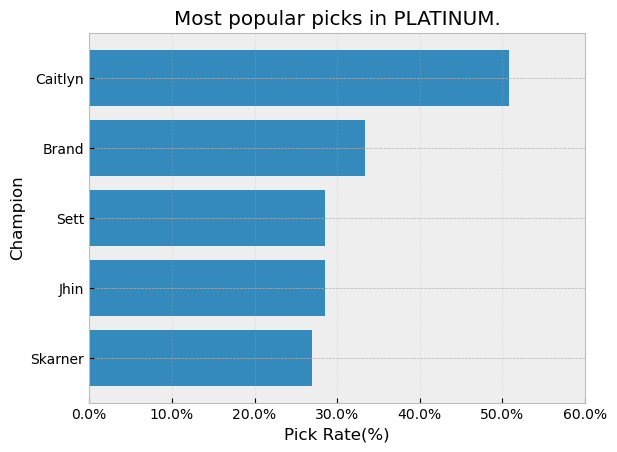

In [24]:
platinum_rank = "PLATINUM"
plat_champion_popularity = champion_division_popularity[champion_division_popularity["rank"]==platinum_rank]
plat_champion_popularity_ready = prepare_champion_popularity(plat_champion_popularity, platinum_rank)
visu_popularity(plat_champion_popularity_ready, platinum_rank)

##### Diamond

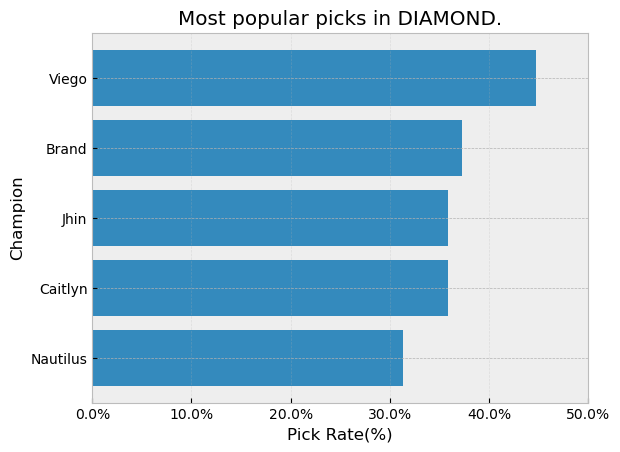

In [25]:
diamond_rank = "DIAMOND"
diamond_champion_popularity = champion_division_popularity[champion_division_popularity["rank"]==diamond_rank]
diamond_champion_popularity_ready = prepare_champion_popularity(diamond_champion_popularity, diamond_rank)
visu_popularity(diamond_champion_popularity_ready, diamond_rank)